In [72]:
import pandas as pd

retail_data = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/Market_retail.csv", sep=",")
retail_data.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",$ 0.5,$ 45,$ -26,3,False
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",$ -,$ 854,$ 290,7,True
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",$ -,$ 140,$ 21,3,True
3,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",$ 0.5,$ 27,$ -22,2,True
4,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",$ 0.5,$ 17,$ -1,2,True


In [73]:
retail_data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', ' Discount ', ' Sales ', ' Profit ', 'Quantity',
       'Feedback?'],
      dtype='object')

In [74]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       8047 non-null   object
 1   Order Date     8047 non-null   object
 2   Customer Name  8047 non-null   object
 3   Country        8047 non-null   object
 4   State          8047 non-null   object
 5   City           8047 non-null   object
 6   Region         8047 non-null   object
 7   Segment        8047 non-null   object
 8   Ship Mode      8047 non-null   object
 9   Category       8047 non-null   object
 10  Sub-Category   8047 non-null   object
 11  Product Name   8047 non-null   object
 12   Discount      8047 non-null   object
 13   Sales         8047 non-null   object
 14   Profit        8047 non-null   object
 15  Quantity       8047 non-null   int64 
 16  Feedback?      8047 non-null   bool  
dtypes: bool(1), int64(1), object(15)
memory usage: 1013.9+ KB


In [ ]:
# modification du type de données des colonnes order date, discount, sales, profit lors du chargement des données dans power bi

In [75]:
retail_data.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
 Discount        0
 Sales           0
 Profit          0
Quantity         0
Feedback?        0
dtype: int64

In [76]:
retail_data['Order Date'] = pd.to_datetime(retail_data['Order Date'], format='%m/%d/%Y')

In [82]:
retail_data.columns = retail_data.columns.str.strip()
retail_data['Discount'] = (
    retail_data['Discount']  # Accès à la colonne
    .str.replace('$', '')    # Retirer le symbole '$'
    .str.replace('-', '')    # Retirer le symbole '-'
    .str.strip()             # Retirer les espaces supplémentaires
)

retail_data['Discount'] = retail_data['Discount'].replace('', '0.0')
retail_data['Discount'] = retail_data['Discount'].astype('float')
retail_data['Discount']

0       0.5
1       0.0
2       0.0
3       0.5
4       0.5
       ... 
8042    0.0
8043    0.5
8044    0.5
8045    0.5
8046    0.0
Name: Discount, Length: 8047, dtype: float64

In [86]:
retail_data['Sales'] = (
    retail_data['Sales']  # Accès à la colonne
    .str.replace('$', '')    # Retirer le symbole '$'
    .str.replace('-', '')    # Retirer le symbole '-'
    .str.replace(',', '.')  #  Remplacer les ',' par '.'
    .str.strip()             # Retirer les espaces supplémentaires
)

retail_data['Sales'] = retail_data['Sales'].astype('float')
retail_data['Sales'] 

0        45.0
1       854.0
2       140.0
3        27.0
4        17.0
        ...  
8042    245.0
8043     30.0
8044     23.0
8045    108.0
8046    867.0
Name: Sales, Length: 8047, dtype: float64

In [89]:
# descriptions des colonnes
column_descriptions = {
    "Order ID": "Numéro de commande",
    "Order Date": "Date de la commande",
    "Customer Name": "Nom du client",
    "Country": "Pays du client",
    "State": "Détail géographique (dépend du pays)",
    "City": "Ville du client",
    "Region": "Pôles géographiques (North, South et Central)",
    "Segment": "Directions business (Consumer, Corporate et Home office)",
    "Ship Mode": "Mode de livraison",
    "Category": "Catégorie du produit",
    "Sub-Category": "Sous-catégorie du produit",
    "Product Name": "Nom du produit",
    "Discount": "Réduction appliquée à la commande",
    "Sales": "Chiffre d'affaire",
    "Profit": "Marge réalisée",
    "Quantity": "Quantité vendue",
    "Feedback?": "Avis du client reçu"
}

def summarize_table_columns(dataframe, column_descriptions=None): # Générer un résumé des colonnes d'une table en prenant en parmètres la table à résumer, et la description des colonnes
    # retourne un résummé des colonnes avec leur descriptif (données brutes reçues)
    summary = []
    
    for col in dataframe.columns:
        summary.append({
            "Colonne": col,
            "Description": column_descriptions.get(col, "Non spécifié") if column_descriptions else "Non spécifié",
            "Type des données": dataframe[col].dtype,
            "Valeurs manquantes (%)": (dataframe[col].isnull().sum() / len(dataframe)) * 100
        })
    
    return pd.DataFrame(summary)

resultat = summarize_table_columns(retail_data, column_descriptions)
resultat

,Colonne,Description,Type des données,Valeurs manquantes (%)
0,Order ID,Numéro de commande,object,0.0
1,Order Date,Date de la commande,datetime64[ns],0.0
2,Customer Name,Nom du client,object,0.0
3,Country,Pays du client,object,0.0
4,State,Détail géographique (dépend du pays),object,0.0
5,City,Ville du client,object,0.0
6,Region,"Pôles géographiques (North, South et Central)",object,0.0
7,Segment,"Directions business (Consumer, Corporate et Ho...",object,0.0
8,Ship Mode,Mode de livraison,object,0.0
9,Category,Catégorie du produit,object,0.0


In [90]:
retail_data.describe()

,Order Date,Discount,Sales,Quantity
count,8047,8047.000000,8047.000000,8047.000000
mean,2013-04-19 12:25:40.748104704,0.112166,177.651279,3.772089
min,2011-01-01 00:00:00,0.000000,1.001000,1.000000
25%,2012-06-08 00:00:00,0.000000,38.000000,2.000000
50%,2013-06-11 00:00:00,0.000000,95.000000,3.000000
75%,2014-04-30 00:00:00,0.100000,238.000000,5.000000
max,2014-12-31 00:00:00,0.900000,999.000000,14.000000
std,NaN,0.183050,208.388653,2.203369


In [71]:
retail_data.to_csv("retail_data.csv")

In [3]:
import pandas as pd

df_immo = pd.read_csv('http://sc-e.fr/c075/immo_db075.csv')

df_immo.head(5)

,Unnamed: 0,id,ville,arrondissement,type,surface,chambres,salle_de_bain,etage,ascenseur,balcon,parking,annee_construction,prix,prix_m2,DPE,date_vente,adresse,latitude,longitude
0,0,1,Bordeaux,16,Maison,56.0,5,1,11,False,False,True,1975,1025621.0,6496,C,2018-01-01 00:00:00.000000000,60 Avenue des Champs-Élysées,48.848558,2.391397
1,1,2,Lille,18,Maison,43.0,2,2,5,False,False,False,1805,1907947.0,9335,C,2018-01-01 02:22:16.746837341,35 Rue du Faubourg Saint-Honoré,48.863034,2.316097
2,2,3,Marseille,1,Studio,291.0,2,1,1,True,False,True,1853,1979708.0,9722,D,2018-01-01 04:44:33.493674683,39 Avenue des Champs-Élysées,48.898678,2.335649
3,3,4,Lille,8,Appartement,111.0,1,1,4,False,False,True,1942,487664.0,5668,B,2018-01-01 07:06:50.240512025,16 Rue de la Paix,48.826698,2.326546
4,4,5,Lille,1,Studio,205.0,1,2,9,False,True,True,1880,1879416.0,2960,B,2018-01-01 09:29:06.987349367,42 Rue de la Paix,48.885737,2.362964


In [4]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20000 non-null  int64  
 1   id                  20000 non-null  int64  
 2   ville               20000 non-null  object 
 3   arrondissement      20000 non-null  int64  
 4   type                20000 non-null  object 
 5   surface             19000 non-null  float64
 6   chambres            20000 non-null  int64  
 7   salle_de_bain       20000 non-null  int64  
 8   etage               20000 non-null  int64  
 9   ascenseur           20000 non-null  bool   
 10  balcon              20000 non-null  bool   
 11  parking             20000 non-null  bool   
 12  annee_construction  20000 non-null  int64  
 13  prix                19000 non-null  float64
 14  prix_m2             20000 non-null  int64  
 15  DPE                 20000 non-null  object 
 16  date

In [5]:
df_immo.isnull().sum()

Unnamed: 0               0
id                       0
ville                    0
arrondissement           0
type                     0
surface               1000
chambres                 0
salle_de_bain            0
etage                    0
ascenseur                0
balcon                   0
parking                  0
annee_construction       0
prix                  1000
prix_m2                  0
DPE                      0
date_vente               0
adresse                  0
latitude                 0
longitude                0
dtype: int64

In [6]:
price_w_navalues = df_immo[df_immo['prix'].isnull()]
price_w_navalues.sample(5)

,Unnamed: 0,id,ville,arrondissement,type,surface,chambres,salle_de_bain,etage,ascenseur,balcon,parking,annee_construction,prix,prix_m2,DPE,date_vente,adresse,latitude,longitude
18638,18638,18639,Paris,9,Maison,200.0,1,2,2,False,False,True,1812,NaN,9581,E,2023-01-16 12:38:07.554377728,98 Rue du Faubourg Saint-Honoré,48.853295,2.341703
19018,19018,19019,Lille,19,Maison,137.0,5,3,19,True,True,True,1926,NaN,13096,B,2023-02-23 01:44:11.352567616,49 Rue de la Paix,48.889328,2.342983
19606,19606,19607,Marseille,8,Loft,118.0,2,3,0,True,False,False,1979,NaN,3276,B,2023-04-22 04:04:18.492924640,50 Avenue des Champs-Élysées,48.873684,2.312334
17284,17284,17285,Marseille,5,Maison,237.0,5,2,13,False,True,False,1816,NaN,10258,F,2022-09-04 17:52:12.336616832,58 Rue de la Paix,48.873972,2.329206
15717,15717,15718,Lille,11,Loft,139.0,0,2,2,True,False,True,1944,NaN,9333,G,2022-04-02 22:00:50.042502128,55 Boulevard Haussmann,48.873682,2.365495


In [7]:
df_immo['surface'].fillna('None', inplace=True)
df_immo['prix'].fillna('Non défini', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16336\4108025615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_immo['surface'].fillna('None', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16336\4108025615.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_immo['surface'].fillna('None', inplace=True)
C:\Users\Lenovo\AppData\Loca

In [11]:
df_immo.columns

Index(['Unnamed: 0', 'id', 'ville', 'arrondissement', 'type', 'surface',
       'chambres', 'salle_de_bain', 'etage', 'ascenseur', 'balcon', 'parking',
       'annee_construction', 'prix', 'prix_m2', 'DPE', 'date_vente', 'adresse',
       'latitude', 'longitude'],
      dtype='object')

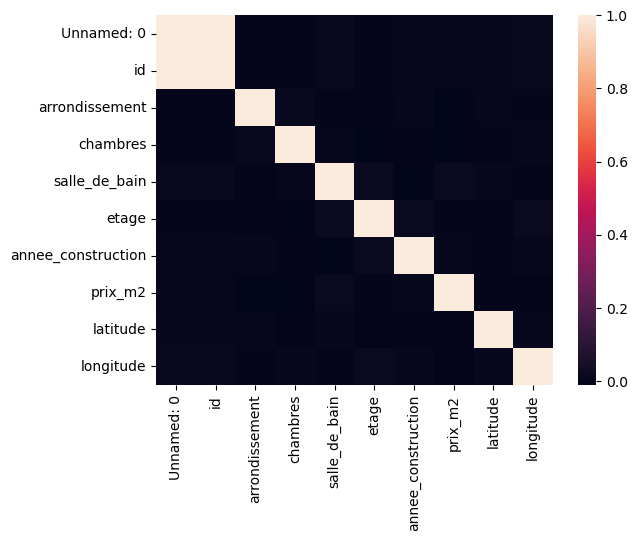

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

remove = df_immo.drop(columns=['Unnamed: 0', 'id', 'ville', 'arrondissement', 'type', 'surface',
       'chambres', 'salle_de_bain', 'etage', 'ascenseur', 'balcon', 'parking',
       'annee_construction', 'prix', 'prix_m2', 'DPE', 'date_vente', 'adresse',
       'latitude', 'longitude'],)
cor_data = df_immo.select_dtypes(include=['number']).corr()
sns.heatmap(cor_data, annot=False)
plt.show()